In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
dados = pd.read_csv('dados/Fish.csv')

In [6]:
dados

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [7]:
dados.describe().round(2)

,Weight,Length1,Length2,Length3,Height,Width
count,159.00,159.00,159.00,159.00,159.00,159.00
mean,398.33,26.25,28.42,31.23,8.97,4.42
std,357.98,10.00,10.72,11.61,4.29,1.69
min,0.00,7.50,8.40,8.80,1.73,1.05
25%,120.00,19.05,21.00,23.15,5.94,3.39
50%,273.00,25.20,27.30,29.40,7.79,4.25
75%,650.00,32.70,35.50,39.65,12.37,5.58
max,1650.00,59.00,63.40,68.00,18.96,8.14


In [8]:
dados.corr().round(4)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.0000,0.9157,0.9186,0.9230,0.7243,0.8865
Length1,0.9157,1.0000,0.9995,0.9920,0.6254,0.8670
Length2,0.9186,0.9995,1.0000,0.9941,0.6404,0.8735
Length3,0.9230,0.9920,0.9941,1.0000,0.7034,0.8785
Height,0.7243,0.6254,0.6404,0.7034,1.0000,0.7929
Width,0.8865,0.8670,0.8735,0.8785,0.7929,1.0000


<AxesSubplot:title={'center':'Fish Weight'}>

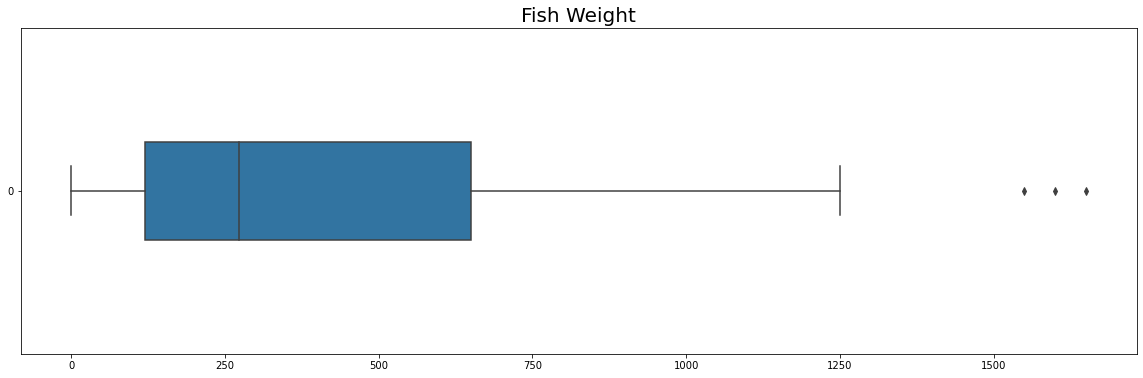

In [9]:
ax = sns.boxplot(data = dados['Weight'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Fish Weight', fontsize=20)
ax

## Dropping outliers

In [10]:
print(np.where(dados['Weight']>1400))

(array([142, 143, 144]),)


In [11]:
dados.drop([142, 143, 144], inplace = True)



<AxesSubplot:title={'center':'Fish Weight'}>

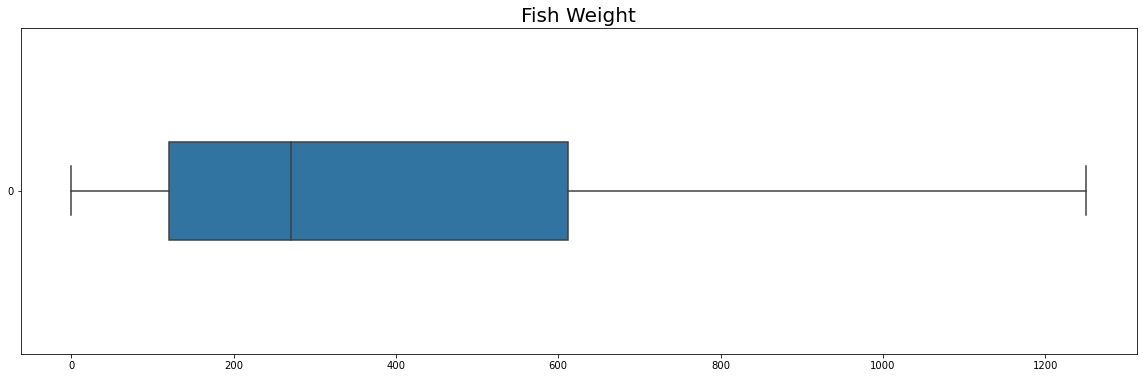

In [12]:
ax = sns.boxplot(data = dados['Weight'], orient = 'h', width = 0.3)
ax.figure.set_size_inches(20, 6)
ax.set_title('Fish Weight', fontsize=20)
ax

<AxesSubplot:title={'center':'Fish Weight'}, xlabel='Weight', ylabel='Density'>

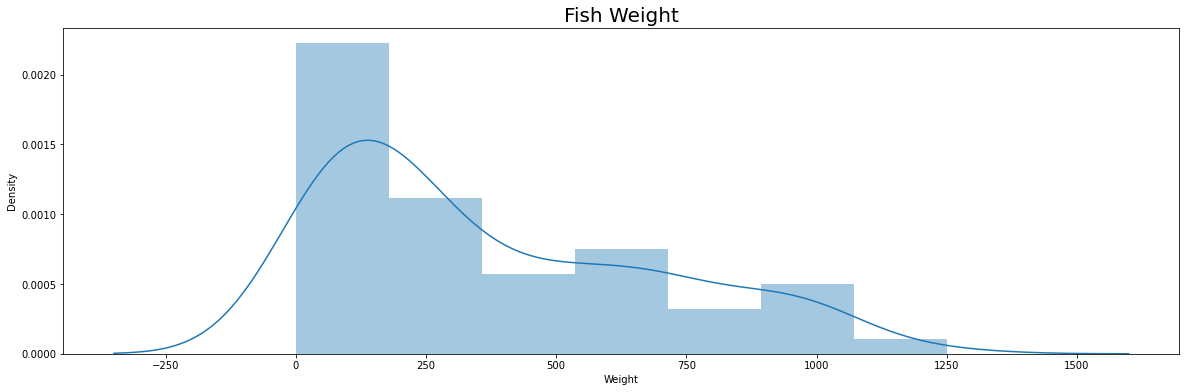

In [13]:
ax = sns.distplot(dados['Weight'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Fish Weight', fontsize=20)
ax

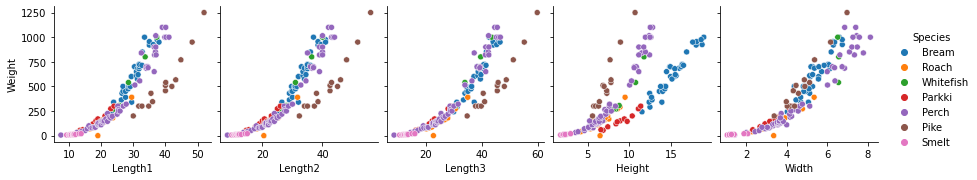

In [14]:
sns.pairplot(dados,
             x_vars=['Length1','Length2','Length3','Height','Width'],
            y_vars=['Weight'],hue='Species')

In [15]:
dados['log_Weight'] = np.log(dados['Weight'] + 1)
dados['log_Length1'] = np.log(dados['Length1'])
dados['log_Length2'] = np.log(dados['Length2'])
dados['log_Length3'] = np.log(dados['Length3'])
dados['log_Height'] = np.log(dados['Height'])
dados['log_Width'] = np.log(dados['Width'])

In [16]:
dados.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,log_Weight,log_Length1,log_Length2,log_Length3,log_Height,log_Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,5.493061,3.144152,3.234749,3.401197,2.444085,1.391282
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,5.673323,3.178054,3.269569,3.440418,2.524127,1.459917
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,5.831882,3.173878,3.277145,3.437208,2.515905,1.546732
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,5.897154,3.269569,3.367296,3.511545,2.543961,1.494139
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,6.066108,3.277145,3.367296,3.526361,2.521239,1.635885


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='log do Peso dos Peixes', ylabel='Density'>

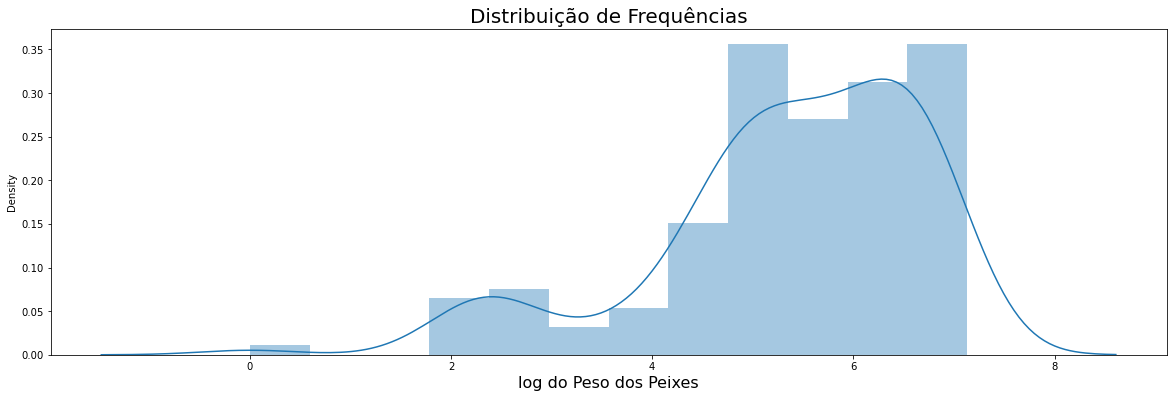

In [17]:
ax = sns.distplot(dados['log_Weight'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Peso dos Peixes', fontsize=16)
ax

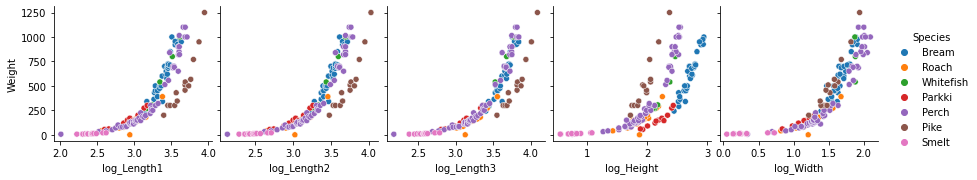

In [18]:
sns.pairplot(dados,
             x_vars=['log_Length1','log_Length2','log_Length3','log_Height','log_Width'],
            y_vars=['Weight'],hue='Species')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = dados[['log_Length1', 'log_Height', 'log_Width']]

In [22]:
y = dados['log_Weight']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2811)

In [32]:
import statsmodels.api as sm

In [33]:
X_train_constant = sm.add_constant(X_train)

In [34]:
X_train_constant

,const,log_Length1,log_Height,log_Width
69,1.0,3.054001,2.336581,1.298446
103,1.0,3.234749,1.969515,1.466722
127,1.0,3.716008,2.524832,2.027595
83,1.0,2.944439,1.777914,1.196193
61,1.0,2.602690,1.923884,0.844365
...,...,...,...,...
28,1.0,3.490429,2.826698,1.824291
73,1.0,2.525729,1.260731,0.692747
68,1.0,2.985682,2.275871,1.149654
85,1.0,2.960105,1.853795,1.262430


In [36]:
modelo_statsmodels = sm.OLS(y_train, X_train_constant, hasconst = True).fit()

In [37]:
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Weight   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     334.4
Date:                Mon, 24 Oct 2022   Prob (F-statistic):           4.42e-58
Time:                        20:47:07   Log-Likelihood:                -73.518
No. Observations:                 124   AIC:                             155.0
Df Residuals:                     120   BIC:                             166.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.0238      0.613     -3.300      0.001      -3.238      -0.809
log_Length1     1.5569      0.280      5.554      0.000       1.002       2.112
log_Height      0.6192      0.164      3.787      0.000       0.295       0.943
log_Width       0.8381      0.312      2.685      0.008       0.220       1.456
==============================================================================
Omnibus:                      257.673   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61281.121
Skew:                         -10.171   Prob(JB):                         0.00
Kurtosis:                     109.991   Cond. No.                         75.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [39]:
modelo = LinearRegression()

In [40]:
modelo.fit(X_train, y_train)

LinearRegression()

In [41]:
print(f'R**2 = {modelo.score(X_train, y_train).round(3)}')

R**2 = 0.893


In [42]:
y_previsto = modelo.predict(X_test)

In [43]:
print(f'R**2 = {metrics.r2_score(y_test, y_previsto).round(3)}')

R**2 = 0.997


In [44]:
entrada = X_test[0:1]
entrada

,log_Length1,log_Height,log_Width
122,3.613617,2.410093,1.891605


In [45]:
modelo.predict(entrada)[0]

6.679994480159444

In [46]:
Length1 = 37.1
Height = 11.135
Width = 6.63
entrada = [[np.log(Length1), np.log(Height), np.log(Width)]]

print(f'Weight: {np.exp(modelo.predict(entrada))[0]:.2f} gramas.')

Weight: 796.31 gramas.


In [47]:
modelo.intercept_

-2.02380213718438

In [48]:
np.exp(modelo.intercept_)

0.1321520484396528

In [49]:
modelo.coef_

array([1.5569377 , 0.61917892, 0.83809321])

In [50]:
X.columns

Index(['log_Length1', 'log_Height', 'log_Width'], dtype='object')

In [53]:
index = ['log_Intercepto', 'log_Lenght1', 'log_Height', 'log_Width']

In [54]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

,Parâmetros
log_Intercepto,-2.023802
log_Lenght1,1.556938
log_Height,0.619179
log_Width,0.838093


In [55]:
y_previsto_train = modelo.predict(X_train)

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='log Peso - Previsão', ylabel='log Peso - Real'>

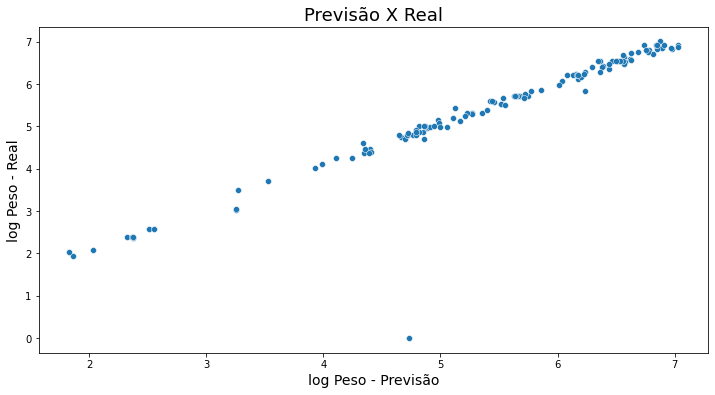

In [56]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log Peso - Previsão', fontsize=14)
ax.set_ylabel('log Peso - Real', fontsize=14)
ax

In [57]:
residuo = y_train - y_previsto_train

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Weight', ylabel='Density'>

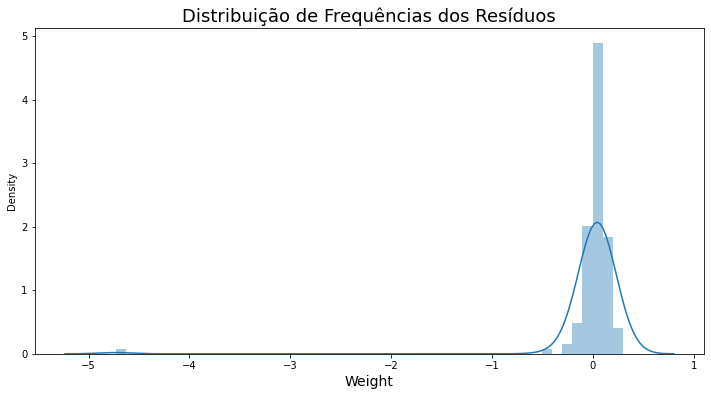

In [58]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Weight', fontsize=14)
ax